In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)


In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"most recent date in measurement dataset is {most_recent_date}")


most recent date in measurement dataset is ('2017-08-23',)


In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
for row in session.query(Measurement.station, Measurement.date,Measurement.prcp,Measurement.tobs).\
                        order_by(Measurement.date.desc()).limit(15).all():
    print(row)
    
# Calculate the date one year from the last date in data set.

year_ago=dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"date one year from the last date in data set is {year_ago}")

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
conn=engine.connect()
df = pd.read_sql("""SELECT  date, prcp FROM measurement where date >='2016-08-23' order by date desc """, conn)
df1=df.set_index('date')
clean_df = df1.dropna()
clean_df.head()



('USC00519397', '2017-08-23', 0.0, 81.0)
('USC00514830', '2017-08-23', 0.0, 82.0)
('USC00519523', '2017-08-23', 0.08, 82.0)
('USC00516128', '2017-08-23', 0.45, 76.0)
('USC00519397', '2017-08-22', 0.0, 82.0)
('USC00519523', '2017-08-22', 0.0, 82.0)
('USC00516128', '2017-08-22', 0.5, 76.0)
('USC00519397', '2017-08-21', 0.0, 81.0)
('USC00514830', '2017-08-21', 0.02, 79.0)
('USC00519523', '2017-08-21', None, 82.0)
('USC00516128', '2017-08-21', 0.56, 76.0)
('USC00519397', '2017-08-20', 0.0, 81.0)
('USC00514830', '2017-08-20', 0.01, 80.0)
('USC00516128', '2017-08-20', None, 78.0)
('USC00519397', '2017-08-19', 0.0, 79.0)
date one year from the last date in data set is 2016-08-23


,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df[["date", "prcp"]].describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


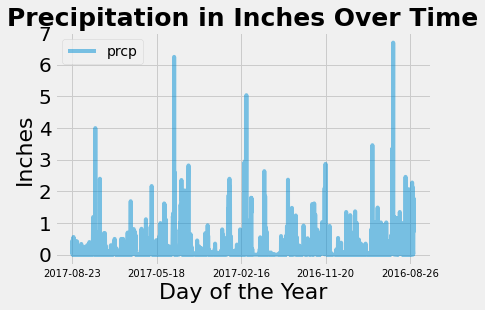

In [39]:
#Use Pandas Plotting with Matplotlib to plot the data
clean_df.plot(x_compat=True, alpha=0.5)
plt.title("Precipitation in Inches Over Time", fontsize=25, weight='bold')
plt.yticks(size=20)
plt.ylabel('Inches', size=22)
plt.xlabel('Day of the Year', size=22)
plt.legend()
plt.xticks( size=10)
plt.savefig('precipitation_over_time.png') #save figure
plt.show()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()